# Ellipsoidal nested sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

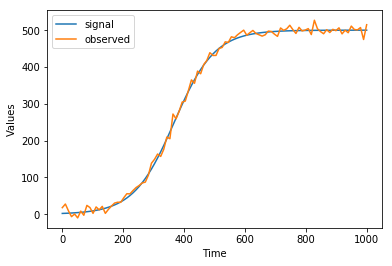

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
sampler = pints.NestedController(log_likelihood, log_prior, method=pints.NestedEllipsoidSampler)

# Set number of iterations
sampler.set_iterations(8000)

# Set the number of posterior samples to generate
sampler.set_n_posterior_samples(1600)

Run the sampler!

In [3]:
samples = sampler.run()
print('Done!')

Running Nested ellipsoidal sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:00.0 -inf          1             
0     2       0:00.0 -inf          1             
0     3       0:00.0 -inf          1             
0     4       0:00.0 -inf          1             
0     5       0:00.0 -inf          1             
0     21      0:00.0 -inf          1             
0     41      0:00.0 -inf          1             
0     61      0:00.0 -inf          1             
0     81      0:00.0 -inf          1             
0     101     0:00.0 -inf          1             
0     121     0:00.0 -inf          1             
0     141     0:00.0 -inf          1             
0     161     0:00.0 -inf          1             
0     181     0:00.0 -inf          1             
0     201     0:00.0 -inf          1             
0     221     0:00.0 -inf          1             
0     241    

c:\users\bclamber\desktop\pints\pints\_log_likelihoods.py:480: RuntimeWarning: invalid value encountered in log
  - np.sum(error**2, axis=0) / (2 * sigma**2))


1320  2227    0:00.9 -347.8914092  0.504105090312
1340  2281    0:00.9 -330.6168775  0.500265816   
1360  2328    0:00.9 -309.2282     0.498443983   
1380  2370    0:00.9 -293.8171853  0.497969543   
1400  2410    0:01.0 -279.8934357  0.49800995    
1420  2451    0:01.0 -266.3189897  0.497805948   
1440  2484    0:01.0 -258.0378128  0.499520154   
1460  2552    0:01.0 -247.4052507  0.493029739777
1480  2600    0:01.1 -236.8658589  0.491363636   
1500  2636    0:01.1 -225.173008   0.492397137746
1520  2687    0:01.1 -213.9476203  0.490161784   
1540  2732    0:01.1 -201.6655181  0.489279588   
1560  2774    0:01.2 -189.7239471  0.489048020219
1580  2837    0:01.2 -181.5782863  0.484612228   
1600  2869    0:01.2 -172.8958572  0.486431754   
1620  2916    0:01.2 -168.909559   0.485294118   
1640  2956    0:01.3 -163.0577496  0.485524256651
1660  3004    0:01.3 -156.4250572  0.484254992   
1680  3064    0:01.3 -148.3997213  0.480855856   
1700  3115    0:01.3 -143.3496959  0.479189687   


4760  8309    0:04.4 -3.166120396  0.551397142   
4780  8345    0:04.4 -3.047574432  0.551415985   
4800  8375    0:04.5 -2.932444447  0.55184953    
4820  8399    0:04.5 -2.820368045  0.552694087   
4840  8428    0:04.5 -2.711647711  0.553188839   
4860  8455    0:04.6 -2.60453396   0.553817505   
4880  8487    0:04.6 -2.501087325  0.554099172   
4900  8518    0:04.6 -2.398735382  0.554446908   
4920  8546    0:04.6 -2.299298082  0.554996317   
4940  8573    0:04.7 -2.204017584  0.555609935   
4960  8601    0:04.7 -2.112417919  0.556151689   
4980  8642    0:04.7 -2.023779949  0.555811696   
5000  8682    0:04.8 -1.938311398  0.55554214    
5020  8704    0:04.8 -1.854591145  0.556478805395
5040  8733    0:04.8 -1.773766565  0.556942278   
5060  8773    0:04.8 -1.695712421  0.55667025    
5080  8810    0:04.9 -1.620128917  0.556599287   
5100  8858    0:04.9 -1.546382146  0.555805154883
5120  8885    0:04.9 -1.475246256  0.556393636   
5140  8920    0:04.9 -1.407100015  0.556455399061


## Plot posterior samples versus true parameter values (dashed lines)

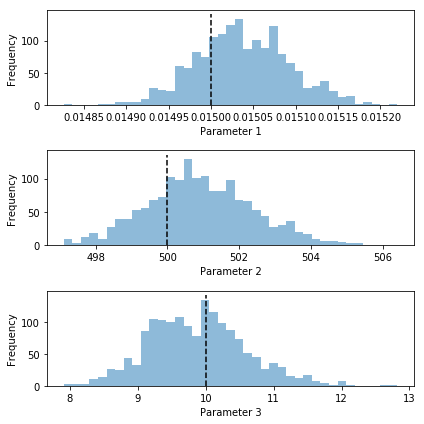

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

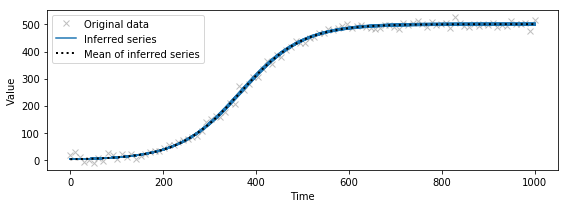

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(sampler.marginal_log_likelihood())
      + ' ± ' + str(sampler.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -381.045801299 ± 0.079351836243


## Effective sample size

In [7]:
print('effective sample size = ' + str(sampler.effective_sample_size()))

effective sample size = 1581.79786037


In [29]:
lst=[None, 1.0, 2.0, None, -3.0]

In [30]:
sum(x is not None for x in lst)

3

In [46]:
res=[i for i in lst if i]
idex = [lst.index(i) for i in res]
idex

[1, 2, 4]

In [34]:
np.random.choice(res)

2.0

In [36]:
res.index(1.0)

0

In [55]:
winners = np.array([[]])
winners.size

0

In [104]:
winners = np.column_stack(([1, 2], [4, 5]))
winners.size
winners1 = np.column_stack(([3, 7], [9, 11]))
winners.size
winners2 = []
len(winners2)

0

In [108]:
proposed = [[3, 4, 5], [6, 7, 8]]
fx = [3.5, 6.7]
np.concatenate((proposed, fx))

ValueError: all the input arrays must have same number of dimensions

In [89]:
previous_winners = []
previous_winners.append(winners)
previous_winners.append(winners1)
previous_winners = np.concatenate(previous_winners)
previous_winners

array([[ 1,  4],
       [ 2,  5],
       [ 3,  9],
       [ 7, 11]])

In [98]:
previous_winners[np.random.choice(previous_winners.shape[0], 10, replace=False), :]

ValueError: Cannot take a larger sample than population when 'replace=False'

In [96]:
previous_winners[np.random.randint(previous_winners.shape[0], size=10, replace=False), :]

TypeError: randint() got an unexpected keyword argument 'replace'

In [103]:
np.random.choice(previous_winners.shape[0],2, replace=False)

array([3, 0])

In [119]:
proposed_short = np.array([sampler._sampler.ask() for i in range(3)])
fx = np.array([3.5, 6.5, 7.74])
np.concatenate((proposed_short, fx))

ValueError: all the input arrays must have same number of dimensions

In [136]:
a = np.transpose(np.vstack([np.transpose(proposed_short), fx]))
b = np.transpose(np.vstack([np.transpose(proposed_short), fx]))
c=np.concatenate([a, b])

In [147]:
c[c[:, 3]>50, :3].shape

(0, 3)

In [152]:
np.delete(c[:, :], 1, 0)

array([[  1.50400151e-02,   5.02683403e+02,   9.37503265e+00,
          3.50000000e+00],
       [  1.50288205e-02,   5.01857765e+02,   8.97674485e+00,
          7.74000000e+00],
       [  1.50400151e-02,   5.02683403e+02,   9.37503265e+00,
          3.50000000e+00],
       [  1.50939730e-02,   5.00395569e+02,   9.91198885e+00,
          6.50000000e+00],
       [  1.50288205e-02,   5.01857765e+02,   8.97674485e+00,
          7.74000000e+00]])